**Task 1: Understand the business case**


The cycle sharing scheme provides means for the people of the city to commute using a convenient, cheap, and green transportation alternative. The
service has 500 bikes at 50 stations across Seattle. Each of the stations has a dock locking system (where all bikes are parked); kiosks (so customers can get a
membership key or pay for a trip); and a helmet rental service. A person can choose between purchasing a membership key or short-term pass. A membership
key entitles an annual membership, and the key can be obtained from a kiosk. Advantages for members include quick retrieval of bikes and unlimited 45-
minute rentals. Short-term passes offer access to bikes for a 24-hour or 3-day time interval. Riders can avail and return the bikes at any of the 50 stations citywide.

Nancy and Eric are two BI of the Company.
Nancy realized that attracting recurring customers on a minimal budget required understanding the customers in the first place (i.e., persona) “Understanding the persona of your brand is essential, as it helps you reach a targeted audience which is likely to convert at a higher probability.
Moreover, this also helps in reaching out to sponsors who target a similar persona. This two-fold approach can make our bottom line positive.”
As Nancy and Eric contemplated the problem at hand, they had questions like the following:
1. Which attribute correlates the best with trip duration and number of trips?
2. Which age generation adapts the most to our service?

**Following is the data dictionary of the Trips dataset that was provided to Nancy and Eric:**

| Feature              | Description                                    |
|:---------------------|:-----------------------------------------------|
| trip_id              | Unique ID assigned to each trip                |
| Starttime            | Day and time when the trip started, in PST     |
| Stoptime             | Day and time when the trip ended, in PST       |
| Bikeid               | ID attached to each bike                       |
| Tripduration         | Time of trip in seconds                        |
| from_station_name    | Name of station where the trip originated      |
| to_station_name      | Name of station where the trip terminated
|from_station_id       | ID of station where trip originated            |
|to_station_id          |   ID of station where trip terminated |
|Usertype       |   Value can include either of the following: short-term pass holder or member|
|Gender     |   Gender of the rider |
|Birthyear  |   Birth year of the rider|

**Task 2: Performing Exploratory Data Analysis**

***Task 2.1 - Importing Python libraries for EDA works***

In [5]:
import random
import datetime
from contextlib import chdir
from nt import getcwd

import os
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import numpy as np
import scipy
from IPython.core.pylabtools import figsize
from scipy import stats
import seaborn as sns

In [11]:
#Changed to the new working directory
getcwd()
os.chdir(r'C:\Users\Tu Nguyen\Desktop\Data Analysis\Trip')
data = pd.read_csv('trip.csv')

In [17]:
# Q1. How big the data was and what it looked like?
# A1. Print some initial observations of the dataset to get a feel of what it contains
print (f'Total number of the dataset is:', len(data), 'observations')
data.head(10) #Print of Observations in the First Ten Columns of Dataset

Total number of the dataset is: 236065 observations


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0
5,436,10/13/2014 10:34,10/13/2014 10:47,SEA00337,808.805,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1974.0
6,437,10/13/2014 11:35,10/13/2014 11:45,SEA00202,596.715,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1978.0
7,438,10/13/2014 11:35,10/13/2014 11:45,SEA00311,592.131,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1983.0
8,439,10/13/2014 11:35,10/13/2014 11:45,SEA00486,586.347,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Female,1974.0
9,440,10/13/2014 11:35,10/13/2014 11:45,SEA00434,587.634,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1958.0


In [19]:
#Print of Observations in the Last Ten Columns of Dataset
print('Last 10 observations')
data.tail(10)

Last 10 observations


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
236055,255236,8/31/2016 22:13,8/31/2016 22:25,SEA00254,674.993,3rd Ave & Broad St,Occidental Park / Occidental Ave S & S Washing...,BT-01,PS-04,Member,Male,1984.0
236056,255237,8/31/2016 22:37,8/31/2016 22:39,SEA00330,144.477,Summit Ave & E Denny Way,Summit Ave E & E Republican St,CH-01,CH-03,Member,Male,1990.0
236057,255238,8/31/2016 22:44,8/31/2016 23:03,SEA00336,1106.063,Pier 69 / Alaskan Way & Clay St,2nd Ave & Blanchard St,WF-01,BT-05,Short-Term Pass Holder,NaN,NaN
236058,255239,8/31/2016 22:44,8/31/2016 23:03,SEA00394,1116.502,Pier 69 / Alaskan Way & Clay St,2nd Ave & Blanchard St,WF-01,BT-05,Short-Term Pass Holder,NaN,NaN
236059,255240,8/31/2016 22:47,8/31/2016 23:03,SEA00370,920.672,Pier 69 / Alaskan Way & Clay St,2nd Ave & Blanchard St,WF-01,BT-05,Short-Term Pass Holder,NaN,NaN
236060,255241,8/31/2016 23:34,8/31/2016 23:45,SEA00201,679.532,Harvard Ave & E Pine St,2nd Ave & Spring St,CH-09,CBD-06,Short-Term Pass Holder,NaN,NaN
236061,255242,8/31/2016 23:48,9/1/2016 0:20,SEA00247,1965.418,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
236062,255243,8/31/2016 23:47,9/1/2016 0:20,SEA00300,1951.173,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
236063,255244,8/31/2016 23:49,9/1/2016 0:20,SEA00047,1883.299,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
236064,255245,8/31/2016 23:49,9/1/2016 0:20,SEA00442,1896.031,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN


**Some quick notices from dataset**
1. Trip duration is in second
2. Birthyear is decimal numbers


***Task 2.2 - Exploring Data Set and Variables***

Types of variables

In [22]:
print('VARIABLE TYPES AND NUMBER OF VARIABLES')
data.info()

VARIABLE TYPES AND NUMBER OF VARIABLES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236065 entries, 0 to 236064
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            236065 non-null  int64  
 1   starttime          236065 non-null  object 
 2   stoptime           236065 non-null  object 
 3   bikeid             236065 non-null  object 
 4   tripduration       236065 non-null  float64
 5   from_station_name  236065 non-null  object 
 6   to_station_name    236065 non-null  object 
 7   from_station_id    236065 non-null  object 
 8   to_station_id      236065 non-null  object 
 9   usertype           236065 non-null  object 
 10  gender             146171 non-null  object 
 11  birthyear          146167 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 21.6+ MB


***Task 2.2 - Exploring Data Set and Variables***

Shape of Dataset

In [28]:
print(f'SHAPE OF DATASET', data.shape)

SHAPE OF DATASET (236065, 12)


In [30]:
print('BASICS STATISTICS OF DATASET')
data.describe()

BASICS STATISTICS OF DATASET


,trip_id,tripduration,birthyear
count,236065.000000,236065.00000,146167.000000
mean,130059.869333,1202.61221,1979.879740
std,72842.289278,2066.42488,10.154978
min,431.000000,60.00800,1931.000000
25%,67746.000000,392.26500,1975.000000
50%,130526.000000,633.23500,1983.000000
75%,192900.000000,1145.01500,1987.000000
max,255245.000000,28794.39800,1999.000000


**Task 3 - CLEAN DATA (IF REQUIRED)**

***Checking Missing Data, Irrelevant, Duplicates***

***Task 3.1 - Spotting Data Problems - MISSING DATA***

In [35]:
# MISSING VALUE OR NOT
def check_missing_data(data):
    """Check if DataFrame has missing values and print result"""
    null_count = data.isnull().sum().sum()

    if null_count > 0:
        print(f"There are {null_count} null values")
    else:
        print("We are lucky, No missing data")

# Usage
check_missing_data(data)


There are 179792 null values


In [45]:
# Check Total Columns
# Verify how many columns you actually have:

print(f"Total columns: {len(data.columns)}")
print(f"Total null values: {data.isnull().sum().sum()}")

Total columns: 12
Total null values: 179792


In [52]:
# To check which column is missing data and show-off.
null_counts = data.isnull().sum()
# Filter to show only columns with null values
columns_with_nulls = null_counts[null_counts > 0]
print(f'COLUMNS WITH NULL:\n{columns_with_nulls}')

COLUMNS WITH NULL:
gender       89894
birthyear    89898
dtype: int64


In [53]:
# Get the column names directly:
# Get list of column names with missing values
cols_with_missing = data.columns[data.isnull().any()].tolist()
print(f"Columns with missing values: {cols_with_missing}")
print(f"Number of columns with nulls: {len(cols_with_missing)}")


Columns with missing values: ['gender', 'birthyear']
Number of columns with nulls: 2


<Axes: >

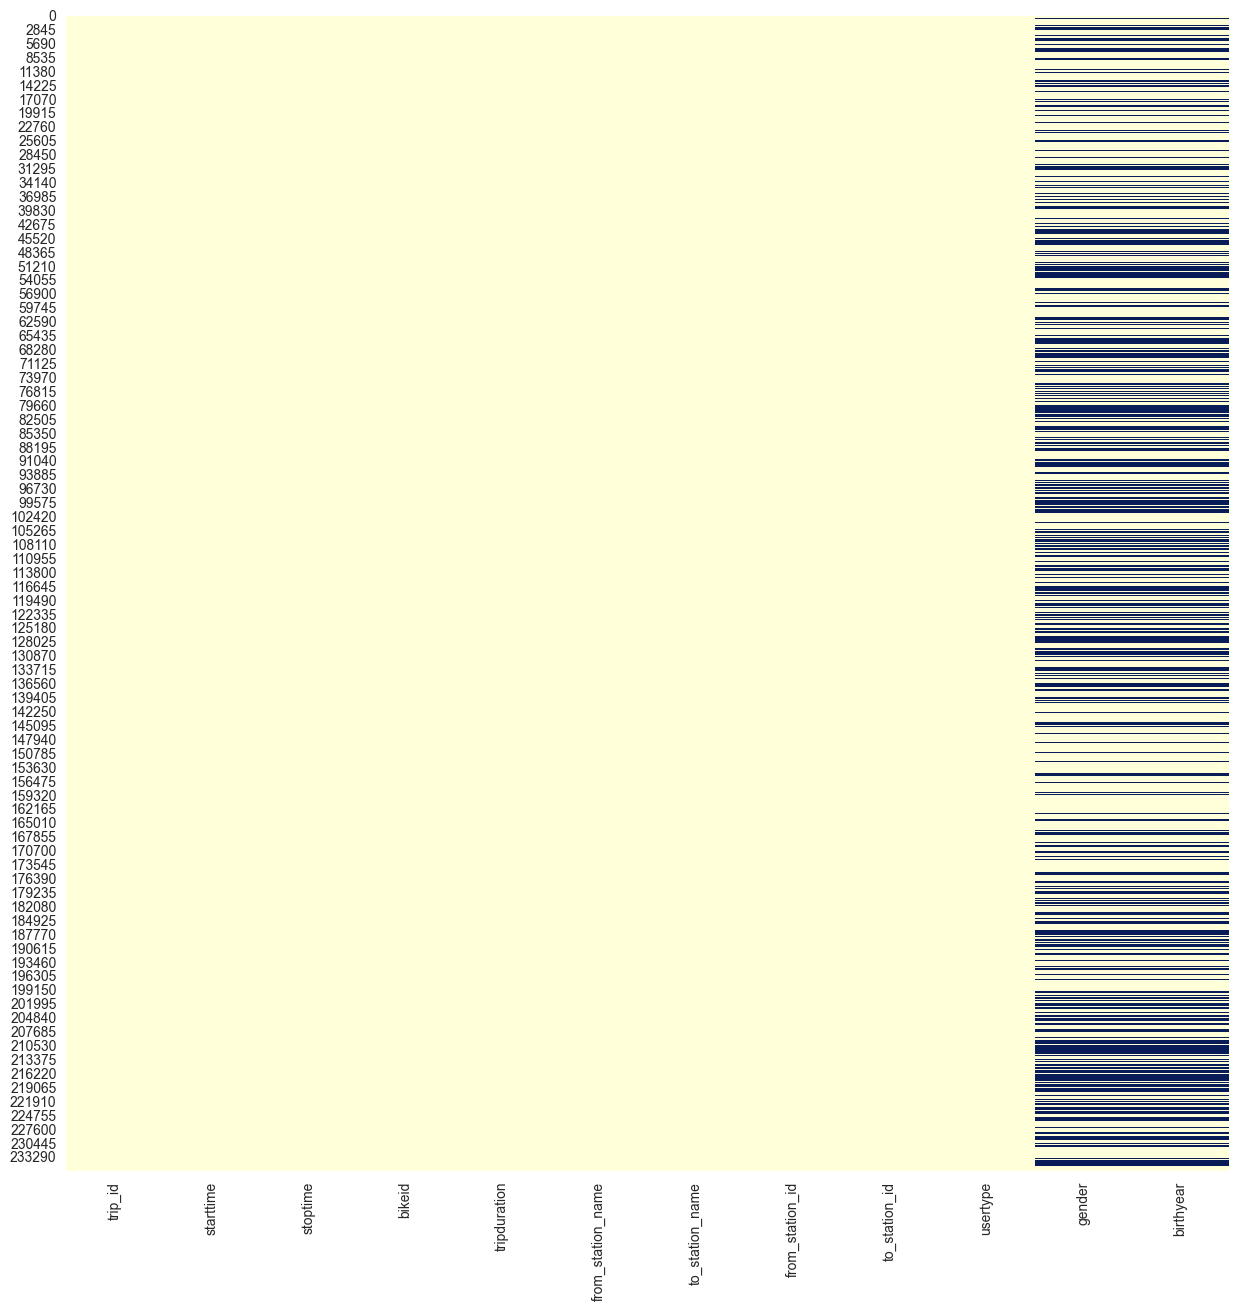

In [61]:
#CHECKING MISSING VALUE WITH HEATMAP
plt.figure(figsize = (15,15))
sns.heatmap(data.isnull(), cbar=False, annot = False, cmap = 'YlGnBu')

<Axes: >

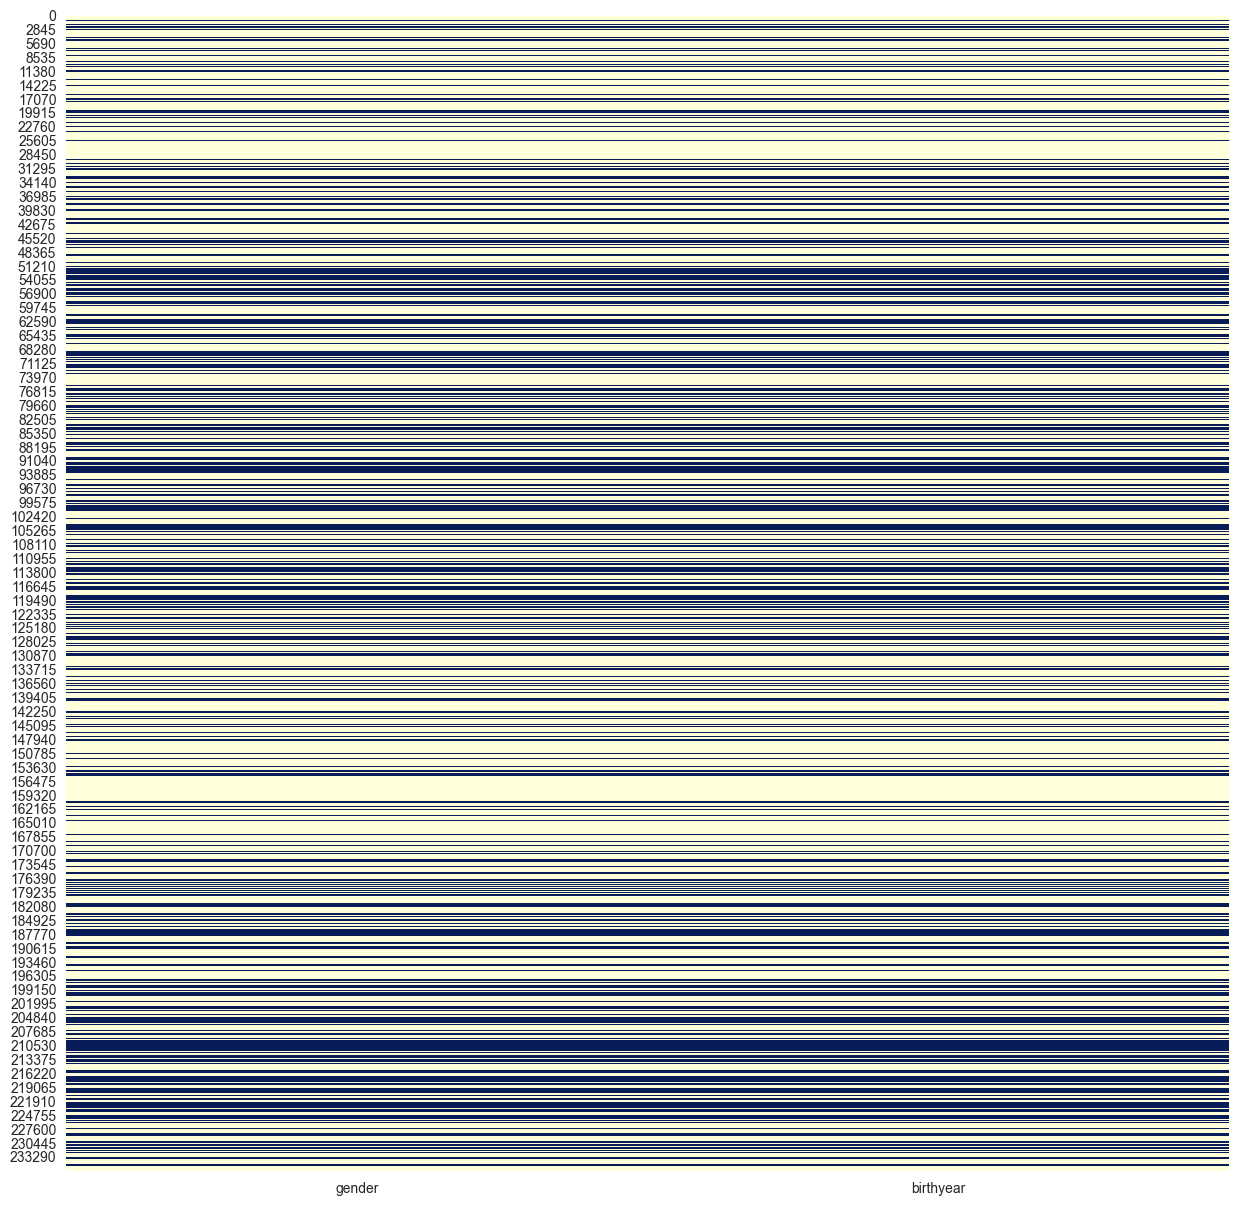

In [60]:
#CHECKING MISSING VALUE WITH HEATMAP - ZOOM IN
plt.figure(figsize = (15,15))
sns.heatmap(data[['gender','birthyear']].isnull(), cbar=False, annot = False, cmap = 'YlGnBu')

***Task 3.2 - Spotting Data Problems _ DUPLICATED DATA***

In [44]:
# DUPLICATED VALUES OR NOT

# Returns True/False for each row (True = duplicate)
duplicates_mask = data.duplicated()

# Count total number of duplicate rows
num_duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Check if any duplicates exist
has_duplicates = data.duplicated().any()
print(f"Has duplicates: {has_duplicates}")


Number of duplicate rows: 0
Has duplicates: False


***Task 3.3 - Spotting Data Problems _ Outliers***

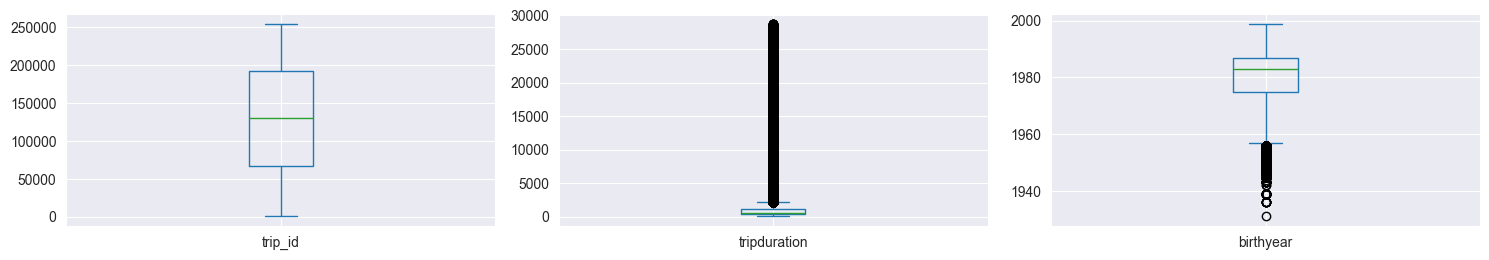

In [69]:
# Some quickcheck to find OUTLIERS
# Visualize outliers using boxplot with better spacing
data.plot(kind='box', subplots=True, figsize=(15, 10), layout=(4, 3))
plt.tight_layout()
plt.show()

***Task 3.4 - Checking & Testing Homogeneity of Variance***

In [70]:
# Check if variance is equal across different groups using Levene's Test or Bartlett's Test
from scipy import stats

# Check if tripduration variance is similar across usertype groups
groups = [data[data['usertype'] == group]['tripduration'].dropna()
          for group in data['usertype'].unique()]

# Levene's test (more robust, use this)
statistic, p_value = stats.levene(*groups)
print(f"Levene's Test - Statistic: {statistic}, p-value: {p_value}")

# Bartlett's test (assumes normal distribution)
statistic, p_value = stats.bartlett(*groups)
print(f"Bartlett's Test - Statistic: {statistic}, p-value: {p_value}")


Levene's Test - Statistic: 24016.360912535096, p-value: 0.0
Bartlett's Test - Statistic: 202990.22275522733, p-value: 0.0


***What the Results Mean***
Both tests show p-value = 0.0 (essentially < 0.05), which means:

Reject the null hypothesis of equal variances (Bac bo gia thuyet O, rang Phuong sai cua Nhom nguoi Sub va Non-sub la giong nhau)

Trip duration variance is significantly different between Customer and Subscriber groups

The variances are heterogeneous (not homogeneous)

The extremely high test statistics (24,016 and 202,990) confirm this is a very strong violation of homogeneity.

Ví Dụ Với Dataset Trip
Với "tripduration" trong dataset bike trip:

Variance thấp: Người dùng có thời gian đi xe ổn định, dễ dự đoán

Variance cao: Thời gian đi xe rất khác nhau - có người đi 5 phút, có người đi 2 giờ


**Task 4 - UNIVARIATE Analysis**

This is the analysis performed on a single variable and thus does not account for any sort of relationship among exploratory variables.

***Task 4.1 - STARTTIME Variable***

In [77]:
# Sorting Date and Time
data = data.sort_values(by=['starttime'])
data.reset_index()


,index,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,0,25091,1/1/2015 0:24,1/1/2015 0:48,SEA00325,1403.479,Lake Union Park / Valley St & Boren Ave N,12th Ave & E Mercer St,SLU-17,CH-15,Short-Term Pass Holder,NaN,NaN
1,1,25092,1/1/2015 0:37,1/1/2015 0:44,SEA00267,459.469,Harvard Ave & E Pine St,Cal Anderson Park / 11th Ave & Pine St,CH-09,CH-08,Member,Male,1991.0
2,2,25093,1/1/2015 0:44,1/1/2015 0:48,SEA00124,255.004,Harvard Ave & E Pine St,REI / Yale Ave N & John St,CH-09,SLU-01,Member,Male,1987.0
3,3,25131,1/1/2015 10:14,1/1/2015 10:33,SEA00204,1145.254,Summit Ave E & E Republican St,Occidental Park / Occidental Ave S & S Washing...,CH-03,PS-04,Short-Term Pass Holder,NaN,NaN
4,4,25132,1/1/2015 10:55,1/1/2015 11:03,SEA00391,470.801,E Pine St & 16th Ave,7th Ave & Union St,CH-07,CBD-03,Member,Male,1980.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
236060,236060,141669,9/9/2015 9:46,9/9/2015 9:54,SEA00460,473.064,E Pine St & 16th Ave,Terry Ave & Stewart St,CH-07,SLU-20,Member,Male,1978.0
236061,236061,141670,9/9/2015 9:49,9/9/2015 9:54,SEA00328,321.262,Pine St & 9th Ave,Republican St & Westlake Ave N,SLU-16,SLU-04,Member,Male,1983.0
236062,236062,141671,9/9/2015 9:49,9/9/2015 9:55,SEA00473,359.629,Westlake Ave & 6th Ave,9th Ave N & Mercer St,SLU-15,DPD-01,Member,Male,1970.0
236063,236063,141672,9/9/2015 9:55,9/9/2015 9:59,SEA00266,252.431,6th Ave & Blanchard St,Republican St & Westlake Ave N,BT-04,SLU-04,Member,Male,1988.0


In [78]:
# Showing the Min and Max in Date-time range
print(f"Date range of dataset: {data['starttime'].min()} - {data['stoptime'].max()}")

Date range of dataset: 1/1/2015 0:24 - 9/9/2015 9:59


**Task 4 - UNIVARIATE Analysis**

***Task 4.1 - USERType Variable***

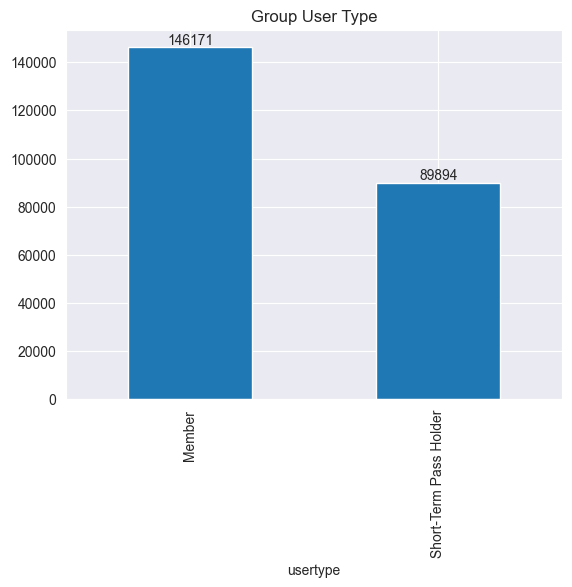

In [82]:
#User type consist of: Member and Short-Term Pass Holder.
group_user_type = data.groupby(data['usertype']).size()
ax = group_user_type.plot(kind='bar', title='Group User Type')

# Add value labels on bars
for i, v in enumerate(group_user_type):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

**Task 4 - UNIVARIATE Analysis**

***Task 4.2 - Gender Variable***

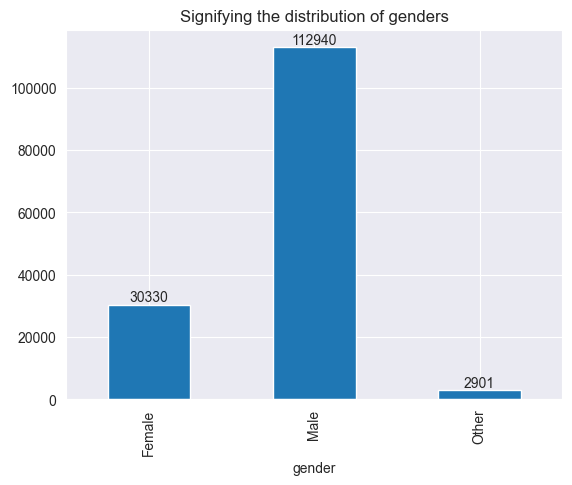

In [87]:
gender_group = data.groupby(data['gender']).size()
gx = gender_group.plot(kind='bar', title='Signifying the distribution of genders')
for i, v in enumerate(gender_group):
    gx.text(i, v, str(v), ha='center', va='bottom')
plt.show()

***Task 4.3 - BIRTH YEAR Variable***

Signifying the distribution of birth years

<Axes: title={'center': 'Birthyear distribution'}, xlabel='birthyear'>

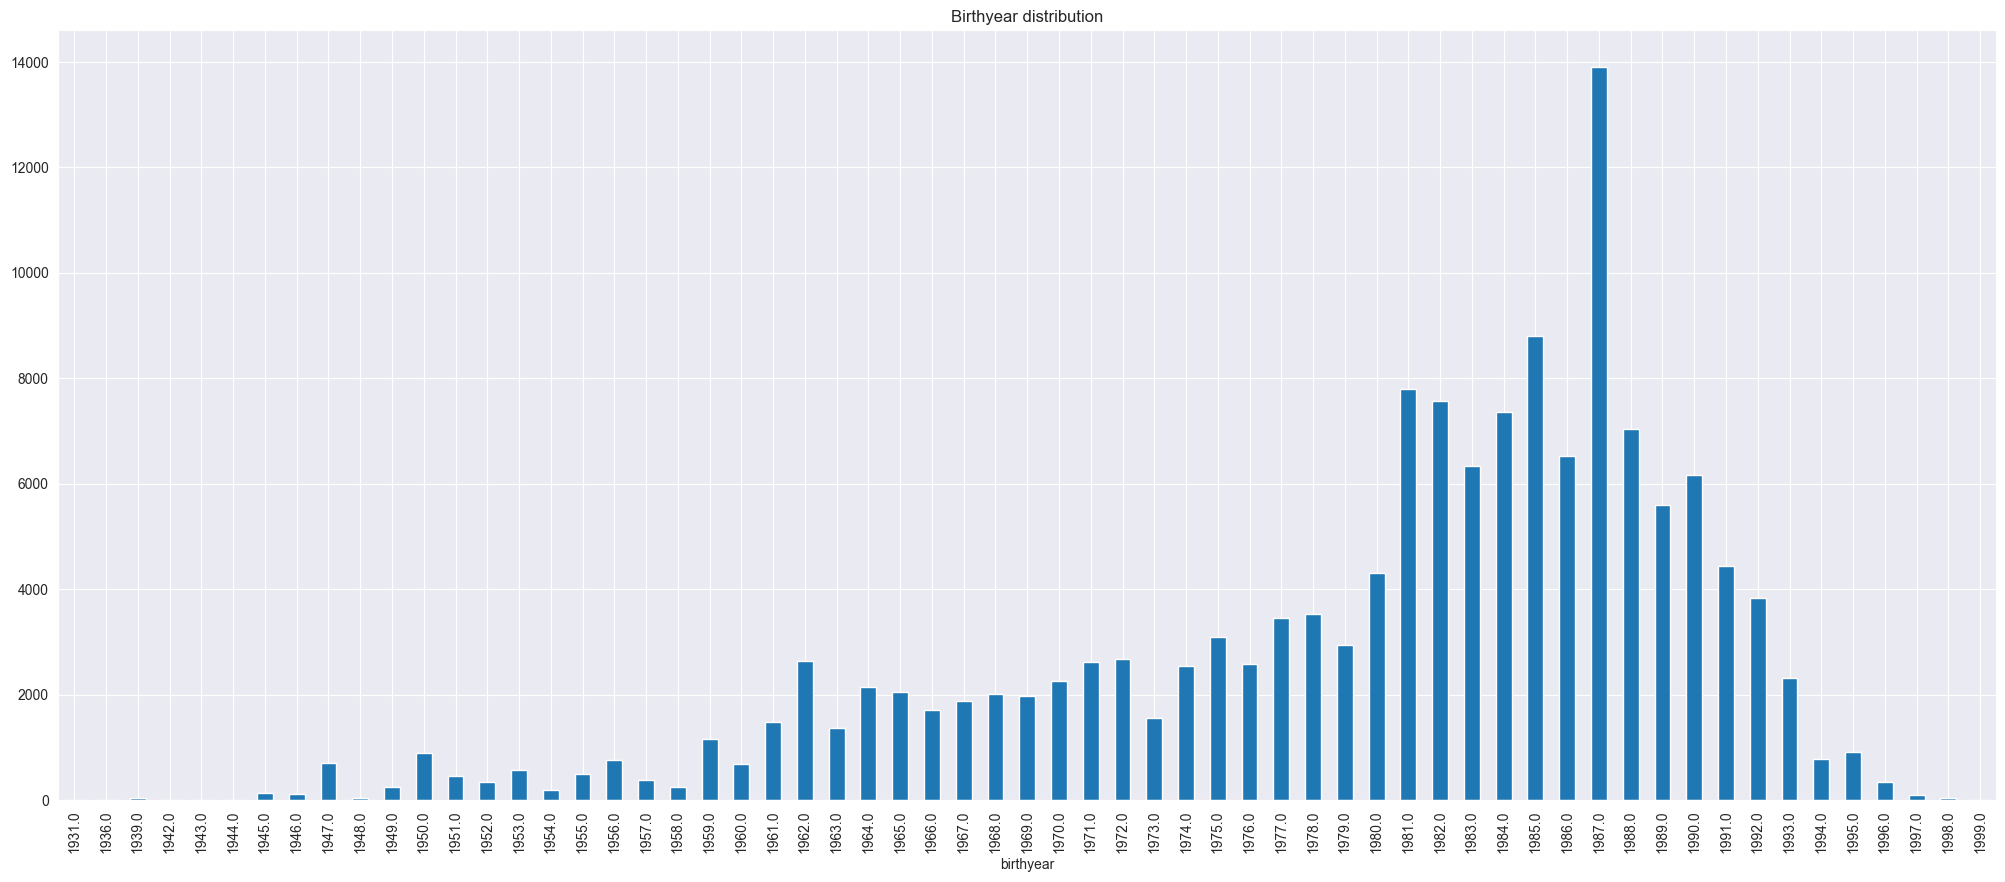

In [92]:
#Step 1- Sorting the birth year first
data = data.sort_values(by = 'birthyear')
#Step 2 - Group birthyear and count the data point
group_birthyear = data.groupby(data['birthyear']).size()
#Step 3 - Plotting by bar/histogram chart
group_birthyear.plot(kind='bar', title='Birthyear distribution', figsize=(25,10))

***Task 5 - Multivariate Analysis***

Multivariate analysis refers to incorporation of multiple exploratory variables to understand the behavior of a response variable.

**Task 5 - Multivariate Analysis**

***Task 5.1 - Analysis birthyear & gender***

<Axes: title={'center': 'Distribution of birth years by Gender'}, xlabel='birthyear'>

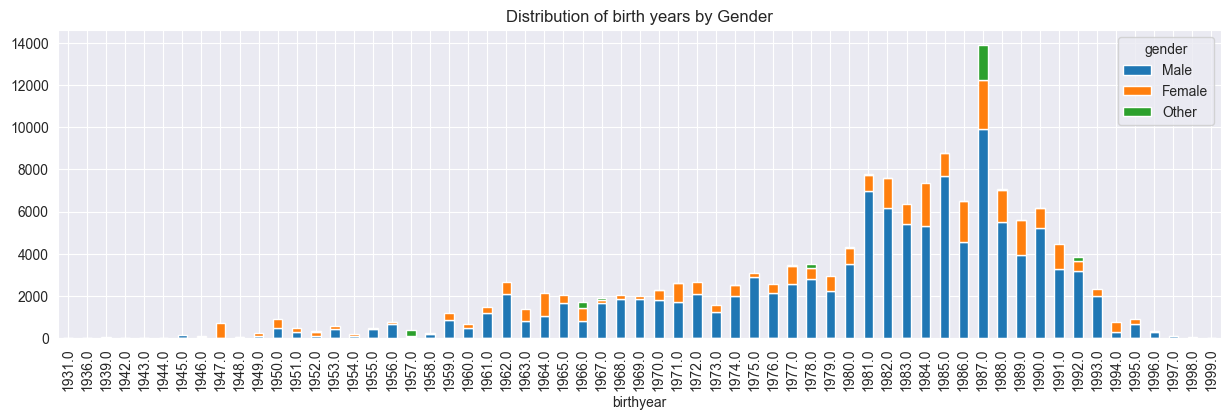

In [94]:
groupby_birthyear_gender = data.groupby(['birthyear','gender'])['birthyear'].count().unstack('gender').fillna(0) #Đếm số lượng dòng trong mỗi nhóm bằng cách sử dụng cột birthyear. Kết quả là một Series với multi-index (birthyear, gender).
# unstack('gender'): Chuyển đổi cột gender từ index thành cột (pivot từ long format sang wide format). Điều này "xoay" dữ liệu để gender trở thành các cột riêng biệt.

groupby_birthyear_gender[['Male','Female','Other']].plot.bar(title = 'Distribution of birth years by Gender'
, stacked=True, figsize = (15,4))

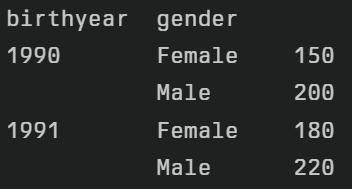
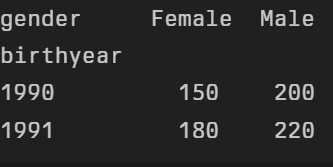

**Task 5 - Multivariate Analysis**

***Task 5.2 - Analysis birthyear & Usertype***

<Axes: title={'center': 'Distribution of birth years by Usertype'}, xlabel='birthyear'>

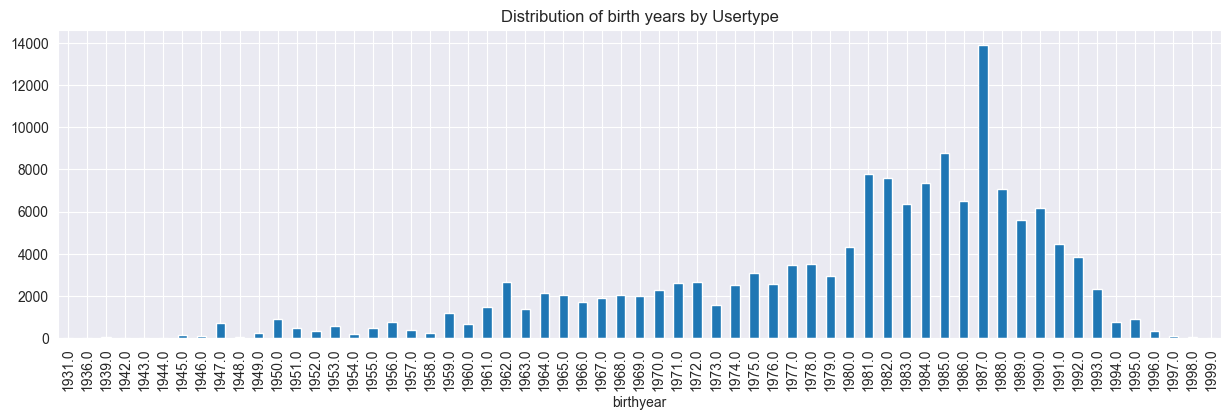

In [95]:
groupby_birthyear_user = data.groupby(['birthyear', 'usertype'])['birthyear'].count().unstack('usertype').fillna(0)
groupby_birthyear_user['Member'].plot.bar(title = 'Distribution of birth years by Usertype', stacked=True, figsize = (15,4))


Based on the "Distribution of birth years by Gender" graph, here are key observations:

## Peak Birth Year Cohort

The highest usage comes from people born around **1987-1989**, with the 1988 cohort showing approximately 14,000 total users. This suggests the core user base is around **36-38 years old** (as of 2025).

## Gender Distribution Patterns

- **Male users** (blue bars) consistently outnumber female users (orange bars) across almost all birth years
- The **"Other" category** (green bars) shows a significant spike specifically around 1988-1989, which appears unusual and may indicate data quality issues or default values
- The gender ratio imbalance is most pronounced in the peak usage years (1980s-1990s cohorts)

## Age Range Insights

- **Oldest users**: Birth years extend back to the 1930s, though counts are minimal
- **Youngest users**: Extend to late 1990s with declining participation
- **Active range**: Primary user base spans approximately 1955-1995 (ages 30-70 in 2025)

## Data Quality Concerns

The dramatic spike in the "Other" gender category around 1988 (reaching nearly 2,000 users) is suspicious. This could indicate:
- A default or placeholder value (e.g., year 1988 + gender "Other" as system defaults)
- Data entry errors
- A specific data migration or system change

## Business Implications

- Target demographic is clearly **millennials and Gen X** (born 1980s-1990s)
- Marketing and bike infrastructure should cater to the 30-45 age group
- The male-dominated user base suggests potential opportunities to increase female ridership through targeted initiatives


**Task 5 - Multivariate Analysis**

***Task 5.3 - Analysis Distriburion of Trip by time***

In [97]:
List_ = list(data['starttime'])
List_ = [datetime.datetime.strptime(x,"%m/%d/%Y %H:%M") for x in List_]
data['starttime_mod'] = pd.Series(List_,index=data.index)
data['starttime_date'] = pd.Series([x.date() for x in List_],index=data.index)
data['starttime_year'] = pd.Series([x.year for x in List_],index=data.index)
data['starttime_month'] = pd.Series([x.month for x in List_], index = data.index)
data['starttime_day'] = pd.Series([x.day for x in List_],index=data.index)
data['starttime_hour'] = pd.Series([x.hour for x in List_],index=data.index)

<Axes: title={'center': 'Distribution of Trip duration by date'}, xlabel='starttime_date'>

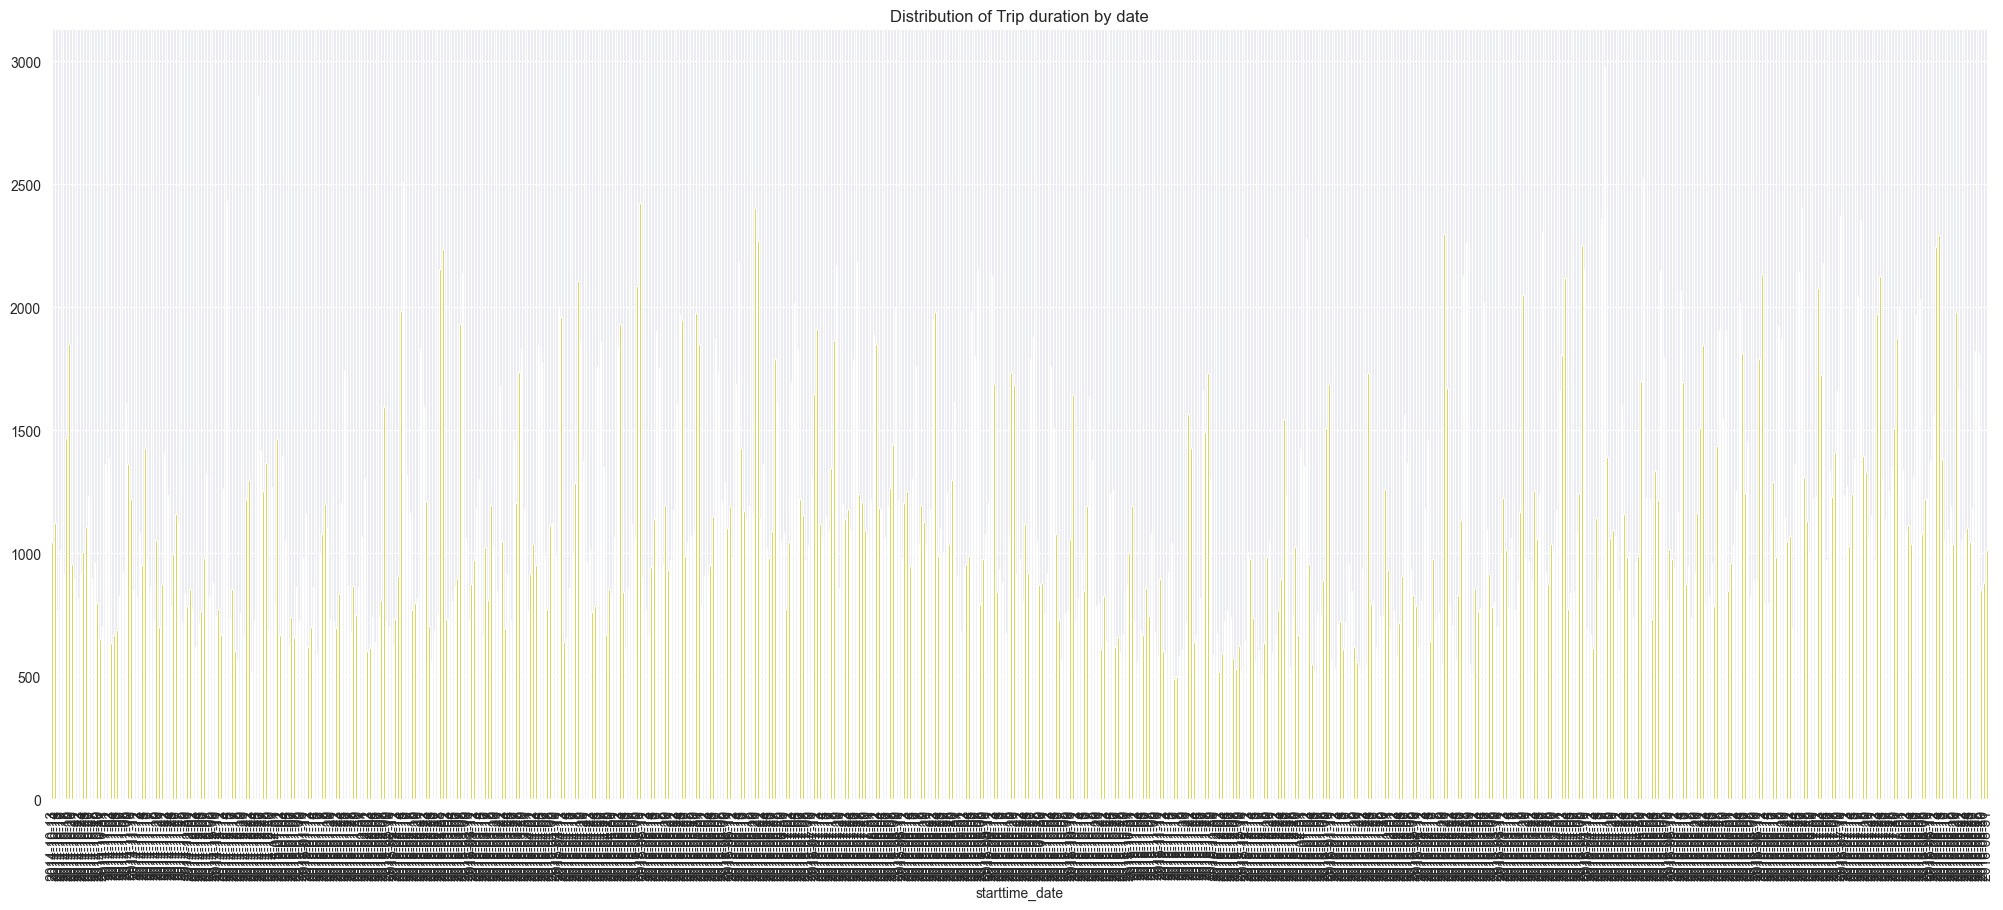

In [103]:
data.groupby('starttime_date')['tripduration'].mean().plot.bar(title = 'Distribution of Trip duration by date' , figsize = (25,10), color = 'y')


**Task 5 - Multivariate Analysis**

***Task 5.4 - Correlation between VARIABLES - AGE & TRIPDURATION***

<Figure size 1500x1500 with 0 Axes>

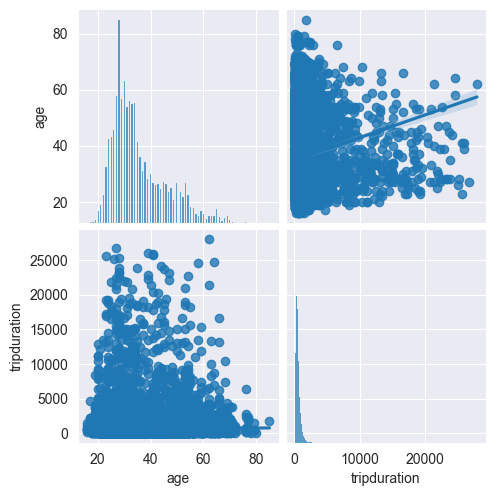

In [109]:
data['age'] = data['starttime_year'] - data['birthyear']
data = data.dropna()
plt.figure(figsize = (15,15))
sns.pairplot(data, vars=['age','tripduration'], kind='reg'),
plt.show()

Based on this pairplot showing the relationship between age and trip duration, here are key insights:

## Age Distribution (Top Left Histogram)

The age distribution is **right-skewed** with a peak around 30-40 years old. There's a long tail extending to very high ages (80+), which may include data quality issues or unrealistic birth years.

## Trip Duration Distribution (Bottom Right Histogram)

Trip duration shows an **extreme right skew** with most trips clustered near zero and a very long tail. This indicates:
- Most trips are short (likely under 2,000 seconds or ~33 minutes)
- Significant outliers exist with durations exceeding 20,000 seconds (~5.5 hours)

## Age vs Trip Duration Relationship (Main Scatter Plots)

### Bottom Left Plot (Main Analysis View)
- **No clear linear correlation** between age and trip duration
- The scatter is heavily concentrated in the lower left (young-to-middle age, short trips)
- Outliers appear across all age groups, suggesting trip duration extremes aren't age-specific

### Top Right Plot (Regression Line)
- The regression line shows a **slight negative trend** (older users take slightly shorter trips), but the fit is very poor given the extreme scatter
- R-squared value would likely be very low, indicating age poorly predicts trip duration

## Data Quality Issues

### Extreme Outliers in Trip Duration
Trip durations exceeding 15,000-25,000 seconds (4-7 hours) are unusual for bike shares and likely represent:
- Bikes not properly returned/locked
- Theft or loss
- System errors
- Users forgetting to end their trip

### Age Outliers
Users with ages around 80+ (or birth years in 1940s or earlier) may be:
- Data entry errors
- Default placeholder values
- Legitimate but rare elderly users

## Recommendations

1. **Clean extreme outliers**: Consider removing or investigating trip durations > 3,600 seconds (1 hour)
2. **Log transformation**: Apply log transformation to trip duration to normalize the distribution for better analysis
3. **Age validation**: Filter unrealistic ages (e.g., < 16 or > 80 years old)
4. **Separate analysis**: Analyze Customers vs Subscribers separately, as their behavior patterns likely differ significantly

The weak relationship shown suggests **age alone is not a strong predictor of trip duration** - other factors like user type, trip purpose, or station location are likely more important.
